2018-05-12 01:05:00: 机组巡检时，发现主齿轮箱二级大齿轮后轴承保持架开裂，经重齿确认需更换主齿轮箱。

In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/san_tang_hu/"
# speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\li_niu_ping"
wind_turbine = "66"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
# speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature)

feature.shape: (131, 75)


In [5]:
# speed.hist(bins=128)

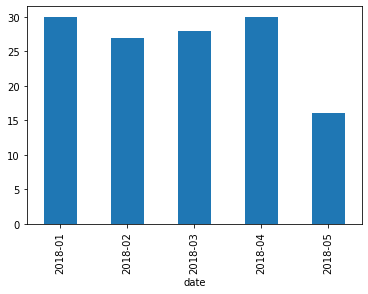

In [6]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [7]:
# 划分train set, test set
train_start = "2018-01"
train_end = "2018-03"

test_start = "2018-04"
test_end = "2018"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (85, 75)
feature_test.shape: (46, 75)


In [15]:
# feature_test = feature["2018-04": ]
feature_test = feature_test
# speed_test = speed

In [9]:
detector = model_entry.OutlierDetector()

In [10]:
detector.fit(feature_train)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.











<AxesSubplot:xlabel='date'>

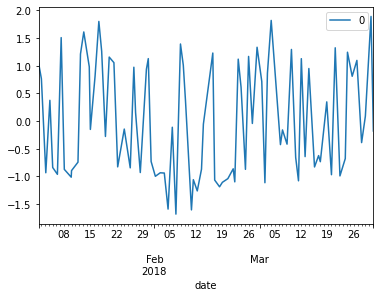

In [11]:
detector.decision_scores.plot()

In [16]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

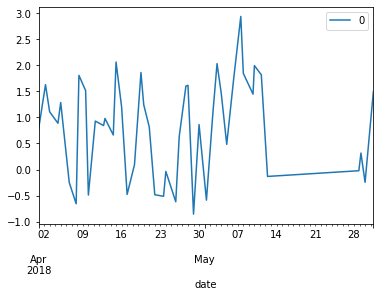

In [17]:
anomaly_scores.plot()

In [18]:
anomaly_scores[anomaly_scores[0] > 4]

,0
date,


In [20]:
feature["2018-05"]

gearbox                                                    \
                      mean        sd      root       rms      peak  skewness   
date                                                                           
2018-05-01 08:00  0.000253  0.230555  0.156245  0.230554  1.025103  0.036441   
2018-05-02 12:00  0.000227  0.326649  0.227950  0.326648  1.332644 -0.030876   
2018-05-03 06:00 -0.000276  0.394899  0.263738  0.394898  1.748327 -0.035206   
2018-05-04 00:00  0.000233  0.347002  0.240635  0.347001  1.556955 -0.040956   
2018-05-05 00:00  0.000170  0.207153  0.141160  0.207152  0.899976  0.010958   
2018-05-06 06:00 -0.000150  0.320080  0.223246  0.320080  1.258625 -0.029636   
2018-05-07 13:00  0.000121  0.388549  0.260103  0.388548  1.931431 -0.032549   
2018-05-08 00:00  0.000331  0.341290  0.234538  0.341289  1.473887 -0.027816   
2018-05-09 18:00  0.000219  0.198006  0.133849  0.198006  1.172737 -0.041674   
2018-05-10 00:00 -0.000118  0.338902  0.235030  0.338901  1.408767 -0.025059   
2018-05-11 06:00  0.000032  0.305442  0.210657  0.305441  1.240616 -0.026497   
2018-05-12 09:00  0.000064  0.203124  0.137244  0.203123  0.958450 -0.019710   
2018-05-28 21:00  0.000146  0.177190  0.119992  0.177190  0.782354  0.010566   
2018-05-29 06:00 -0.000075  0.282286  0.188017  0.282285  1.249958  0.066919   
2018-05-30 00:00 -0.000235  0.233699  0.158402  0.233699  0.984456  0.061706   
2018-05-31 12:00  0.000625  0.299677  0.201702  0.299677  1.315562  0.026837   

                                                          ...  \
                  kurtosis     crest clearance     shape  ...   
date                                                      ...   
2018-05-01 08:00 -0.037754  4.446254  6.560874  1.251579  ...   
2018-05-02 12:00 -0.337928  4.079758  5.846224  1.228528  ...   
2018-05-03 06:00  0.132213  4.427282  6.629029  1.263132  ...   
2018-05-04 00:00 -0.243033  4.486886  6.470184  1.233745  ...   
2018-05-05 00:00 -0.087603  4.344514  6.375585  1.247178  ...   
2018-05-06 06:00 -0.344306  3.932225  5.637848  1.228815  ...   
2018-05-07 13:00  0.195703  4.970893  7.425629  1.262063  ...   
2018-05-08 00:00 -0.151074  4.318586  6.284218  1.240783  ...   
2018-05-09 18:00  0.008468  5.922738  8.761650  1.253251  ...   
2018-05-10 00:00 -0.285758  4.156866  5.993994  1.233291  ...   
2018-05-11 06:00 -0.254479  4.061719  5.889276  1.237194  ...   
2018-05-12 09:00  0.020615  4.718561  6.983550  1.254074  ...   
2018-05-28 21:00 -0.018849  4.415340  6.520061  1.251786  ...   
2018-05-29 06:00  0.158006  4.427998  6.648106  1.265091  ...   
2018-05-30 00:00 -0.048875  4.212501  6.214920  1.250730  ...   
2018-05-31 12:00  0.069328  4.389931  6.522298  1.257273  ...   

                 high_speed_shaft                                        \
                               p5          p6           p7           p8   
date                                                                      
2018-05-01 08:00      4245.797750   92.221294  5334.342066  8133.174463   
2018-05-02 12:00      4502.464749  117.434154  5663.222725  8511.077571   
2018-05-03 06:00      4217.566660  118.554427  5419.420970  8484.255090   
2018-05-04 00:00      4917.945704  121.666686  6043.020823  8669.192390   
2018-05-05 00:00      4307.069150   93.398759  5417.994641  8247.820723   
2018-05-06 06:00      4771.469238  125.884481  5928.485932  8666.867003   
2018-05-07 13:00      4407.541695  130.943626  5629.556701  8643.253866   
2018-05-08 00:00      4810.461558  129.757916  5965.724573  8680.259690   
2018-05-09 18:00      4386.736407   99.260507  5527.548180  8358.606304   
2018-05-10 00:00      5238.004838  125.237216  6319.998516  8768.374387   
2018-05-11 06:00      5349.977889  121.065532  6397.738547  8753.173282   
2018-05-12 09:00      4260.359014   96.729492  5398.503381  8290.062814   
2018-05-28 21:00      4436.011787   78.291384  5548.208191  8238.006495   
2018-05-29 06:00      3881.954461   88.393580  5085.969184  83